In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
!pip install seaborn

In [5]:
!pip freeze

argon2-cffi @ file:///C:/ci/argon2-cffi_1613038019788/work
async-generator==1.10
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
bleach @ file:///tmp/build/80754af9/bleach_1612211392645/work
brotlipy==0.7.0
certifi==2020.12.5
cffi @ file:///C:/ci/cffi_1613247308275/work
chardet @ file:///C:/ci/chardet_1607706910910/work
colorama @ file:///tmp/build/80754af9/colorama_1607707115595/work
cryptography @ file:///C:/ci/cryptography_1616769432139/work
decorator @ file:///tmp/build/80754af9/decorator_1617916966915/work
defusedxml @ file:///tmp/build/80754af9/defusedxml_1615228127516/work
entrypoints==0.3
idna @ file:///home/linux1/recipes/ci/idna_1610986105248/work
importlib-metadata @ file:///C:/ci/importlib-metadata_1617877486026/work
ipykernel @ file:///C:/ci/ipykernel_1596208728219/work/dist/ipykernel-5.3.4-py3-none-any.whl
ipython @ file:///C:/ci/ipython_1617121109687/work
ipython-genutils @ file:///tmp/build/80

In [2]:
df = pd.read_csv('../data/raw/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Информация с Kaggle

age - age in years\
sex - (1 = male; 0 = female)\
cp - chest pain type\
trestbps - resting blood pressure (in mm Hg on admission to the hospital)\
chol - serum cholestoral in mg/dl\
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\
restecg - resting electrocardiographic results\
thalach - maximum heart rate achieved\
exang - exercise induced angina (1 = yes; 0 = no)\
oldpeak - ST depression induced by exercise relative to rest\
slope - the slope of the peak exercise ST segment\
ca - number of major vessels (0-3) colored by flourosopy\
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect\
target - have disease or not (1=yes, 0=no)\

## Простые статистики
Пропусков в датасете нет

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


Text(0.5, 1.0, 'Распределение по полу')

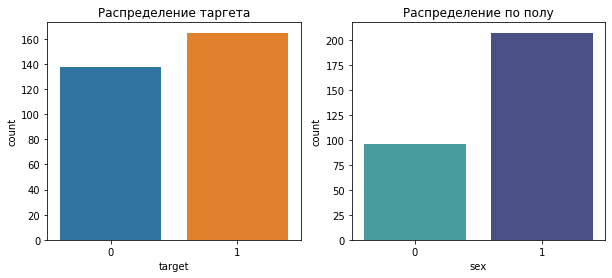

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x="target", data=df, ax=ax[0,]).set_title("Распределение таргета")
sns.countplot(x="sex", data=df, palette="mako_r", ax=ax[1]).set_title("Распределение по полу")


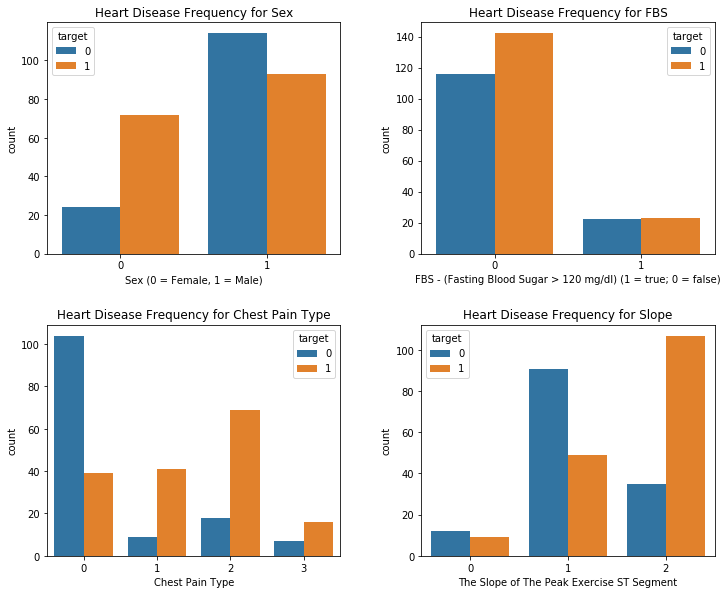

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
fig.tight_layout(w_pad=5, h_pad=5)

sns.countplot(x="sex", hue="target", data=df, ax=ax[0,0]).set_title('Heart Disease Frequency for Sex')
ax[0,0].set_xlabel('Sex (0 = Female, 1 = Male)')

sns.countplot(x="fbs", hue="target", data=df, ax=ax[0,1]).set_title('Heart Disease Frequency for FBS')
ax[0,1].set_xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')

sns.countplot(x="cp", hue="target", data=df, ax=ax[1,0]).set_title('Heart Disease Frequency for Chest Pain Type')
ax[1,0].set_xlabel('Chest Pain Type')

sns.countplot(x="slope", hue="target", data=df, ax=ax[1,1]).set_title('Heart Disease Frequency for Slope')
ax[1,1].set_xlabel('The Slope of The Peak Exercise ST Segment')

plt.show()

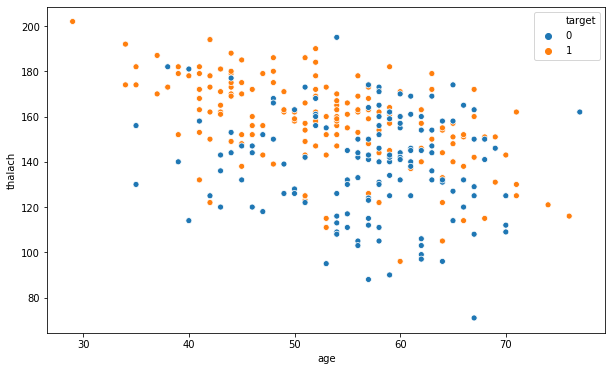

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="age", y="thalach", hue="target", data=df)

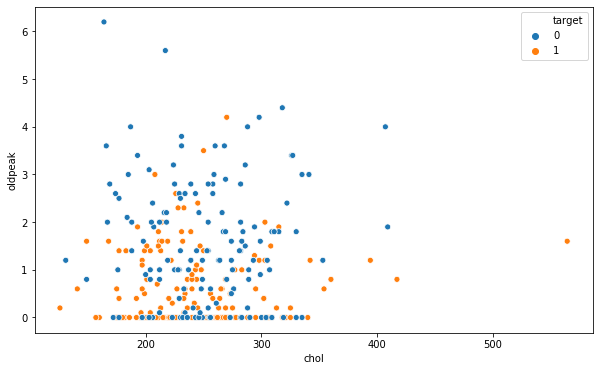

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="chol", y="oldpeak", hue="target", data=df)

In [11]:
category_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numeric_features =['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
assert len(category_features) + len(numeric_features) == len(df.columns) - 1